#Problem Statement: Analysis of Rural Road Infrastructure and Safety for Improvement Prioritization

##An Overview of the Dataset
Details about features in the dataset:

Traffic Attributes (12):

ID: This is a unique identifier of the accident record.

Source: Indicates source of the accident report (i.e. the API which reported the accident.).

TMC: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.

Severity: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

Start_Time: Shows start time of the accident in local time zone.

End_Time: Shows end time of the accident in local time zone.

Start_Lat: Shows latitude in GPS coordinate of the start point.

Start_Lng: Shows longitude in GPS coordinate of the start point.

End_Lat: Shows latitude in GPS coordinate of the end point.

End_Lng: Shows longitude in GPS coordinate of the end point.

Distance(mi): The length of the road extent affected by the accident.

Description: Shows natural language description of the accident.

Address Attributes (9):

Number: Shows the street number in address field.

Street: Shows the street name in address field.

Side: Shows the relative side of the street (Right/Left) in address field.

City: Shows the city in address field.

County: Shows the county in address field.

State: Shows the state in address field.

Zipcode: Shows the zipcode in address field.

Country: Shows the country in address field.

Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).

Weather Attributes (11):

Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.

Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).

Temperature(F): Shows the temperature (in Fahrenheit).

Wind_Chill(F): Shows the wind chill (in Fahrenheit).

Humidity(%): Shows the humidity (in percentage).

Pressure(in): Shows the air pressure (in inches).

Visibility(mi): Shows visibility (in miles).

Wind_Direction: Shows wind direction.

Wind_Speed(mph): Shows wind speed (in miles per hour).

Precipitation(in): Shows precipitation amount in inches, if there is any.

Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

POI Attributes (13):

Amenity: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

Crossing: A POI annotation which indicates presence of crossing in a nearby location.

Give_Way: A POI annotation which indicates presence of give_way sign in a nearby location.

Junction: A POI annotation which indicates presence of junction in a nearby location.

No_Exit: A POI annotation which indicates presence of no_exit sign in a nearby location.

Railway: A POI annotation which indicates presence of railway in a nearby location.

Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

Station: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

Stop: A POI annotation which indicates presence of stop sign in a nearby location.

Traffic_Calming: A POI annotation which indicates presence of traffic_calming means in a nearby location.

Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

Period-of-Day (4):

Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.

### Summary (Key Findings)

-Oklahoma city (under Rural Areas) has most Accidents

-Year 2022 has most Number of Accidents

-DECEMBER has most accidents occured(probably winters has most accidents)

-Less Number of accidents occured on weekends. ( Probably less travelling for work in weekends.)

-High number of accidents occured around 7am to 9am in the morning.

-Most accidents occured during day

-I-81 S    277 --- Street has most accidents happened.

-Around 80% of accidents has severity as moderate ( severity-2)

-Year 2021 has most severity level 3 and level 4

-Severity is mostly Moderate( severity-2 ) with No Safety attributes Present Nearby accidents.

-With safety attributes like bump, no exit, No way are Not There, more accidents have occured.


-42% of accidents have occured in 36(F) to 66(F) temperature

-61% cases occured within high humidity value ( 60-100 % level) - Humidity(%) has a linear relationship with the frequency of accidents.

-Most accidents occured with visibilty less than 15 miles.

# Recommendations

For specific areas where road infrastructure improvements could be most beneficial.

-- Improve Infrasture with Road safety attributes like Bump, traffic lights, , no exit, No way, Exit and More sign Boards on the Road

-- : Government agencies and policymakers should aimed at improving road safety. This may include stricter enforcement of traffic laws, enhanced driver education programs, or initiatives to reduce distracted driving.

-- Reduce Traffic in less Visibilty, humid conditions

-- Improve Road network in Rural areas and Hotspot points

-- Provide Weather condtions in advance and Clear warning signs to Public

-- Prioritizing safety on roads more as is fundamental moral imperative


Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter
import folium
from IPython.display import IFrame
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects
plt.rcParams['font.family'] = 'sans-serif'
from sklearn.preprocessing import LabelEncoder

Connecting to the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Take Home Assignment/US_Accidents_March23_sampled_500k.csv'

Reading the dataset

In [ ]:
df=pd.read_csv(data_path)
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,45.520225,-123.084211,0.158,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,26.703141,-80.111133,0.040,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,34.566822,-112.267150,0.549,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,38.406680,-78.619310,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df.shape

(500000, 46)

Finding Columns

In [ ]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


-Distance(mi) is 25% -0, 75%- 0,029 shows most accidents are point accidents

-tempertaure range from -77(F) to 207(F) shown extreme weather conditions

# Preprocessing the Data to focus on Rural Areas

In [ ]:
pip install uszipcode --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.50 which is incompatible.


In [ ]:
pip install --upgrade uszipcode --quiet

In [ ]:
from uszipcode import ZipcodeTypeEnum

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# We are filtering out datapoints based upon Zipcodes.
Acoording to US Census 2010, Of the 33,140 ZCTAs identified ZCTAs were 100% urban and 17,033 ZCTAs were 100% rural.
- we are filtering out Zipcodes based on Population.
- According to US Census: if Population of a area< 10000, & population Denisty
 is less 1000 people in 1mile area,  we are classifing it as Rural
- Taking only Top 10,000 unique rural areas for our analysis here.

In [ ]:
from uszipcode import SearchEngine # using USZIPCODE library

# Create a search engine instance
search = SearchEngine(simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive)

# Get zip codes for rural areas using population
rural_zip_codes = []

for zipcode in search.by_population(lower=0,upper=10000,returns =10000):    #we are considering only 10000 top rural areas of better understanding.
    rural_zip_codes.append(zipcode.zipcode)

print(rural_zip_codes)


Download /root/.uszipcode/comprehensive_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/comprehensive_db.sqlite ...
  50.00 MB downloaded ...
  100.00 MB downloaded ...
  150.00 MB downloaded ...
  200.00 MB downloaded ...
  250.00 MB downloaded ...
  300.00 MB downloaded ...
  350.00 MB downloaded ...
  400.00 MB downloaded ...
  Complete!
['45439', '39114', '32579', '10970', '04730', '47446', '10510', '06798', '98528', '29645', '71241', '47122', '72202', '83644', '63012', '53572', '95119', '53527', '55807', '79102', '25064', '67230', '95391', '48040', '15071', '31408', '48144', '06371', '45714', '15203', '90248', '19609', '46040', '17872', '73055', '36545', '93730', '29654', '20636', '35058', '56649', '64109', '31779', '65711', '49738', '60442', '37807', '24211', '41129', '95814', '81611', '79070', '20732', '12571', '28610', '59860', '74745', '38011', '67147', '21617', '28457', '04976', '46406', '38570', '35906', '81050', '74426', '60523', '83

Filtering by Population Density

In [ ]:
from uszipcode import SearchEngine # using USZIPCODE library

# Create a search engine instance
search = SearchEngine(simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive)

# Get zip codes for rural areas using population density
rural_zip_codes_density = []

for zipcode in search.by_population_density(lower=0, upper=1000,returns =10000):    #we are considering only 10000 top rural areas of better understanding.
    rural_zip_codes_density.append(zipcode.zipcode)

print(rural_zip_codes_density)

Exception ignored in: <function SearchEngine.__del__ at 0x7f01335d8040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1816, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1858, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 926, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2426, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2649, in _do_close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2635, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2627, in _connection_rollback_impl
  File

['02043', '44321', '08809', '37075', '34667', '95991', '07866', '07828', '37130', '46143', '01745', '68138', '01966', '92399', '12553', '08004', '58104', '60045', '01075', '62034', '21703', '44420', '02858', '63048', '85248', '26105', '45226', '62040', '01030', '06095', '33050', '43123', '44706', '53092', '03874', '26037', '34753', '49442', '25143', '29466', '76544', '32132', '48708', '80134', '12180', '16803', '37209', '66616', '48360', '08243', '10577', '85143', '94005', '20732', '46845', '02324', '07069', '14534', '15007', '78572', '78574', '94510', '18037', '22407', '27455', '48519', '55055', '08036', '63304', '01730', '27203', '78526', '29572', '33839', '50313', '60041', '91302', '15025', '62822', '87402', '94553', '12524', '33936', '36066', '66211', '19034', '21702', '45150', '92345', '19560', '28104', '75569', '03609', '55129', '45417', '58102', '30337', '55802', '62535', '67205', '95673', '13103', '15620', '37343', '97504', '92240', '63034', '85253', '08048', '15367', '46930', 

In [ ]:
print(rural_zip_codes_density)
len(rural_zip_codes_density)

['02043', '44321', '08809', '37075', '34667', '95991', '07866', '07828', '37130', '46143', '01745', '68138', '01966', '92399', '12553', '08004', '58104', '60045', '01075', '62034', '21703', '44420', '02858', '63048', '85248', '26105', '45226', '62040', '01030', '06095', '33050', '43123', '44706', '53092', '03874', '26037', '34753', '49442', '25143', '29466', '76544', '32132', '48708', '80134', '12180', '16803', '37209', '66616', '48360', '08243', '10577', '85143', '94005', '20732', '46845', '02324', '07069', '14534', '15007', '78572', '78574', '94510', '18037', '22407', '27455', '48519', '55055', '08036', '63304', '01730', '27203', '78526', '29572', '33839', '50313', '60041', '91302', '15025', '62822', '87402', '94553', '12524', '33936', '36066', '66211', '19034', '21702', '45150', '92345', '19560', '28104', '75569', '03609', '55129', '45417', '58102', '30337', '55802', '62535', '67205', '95673', '13103', '15620', '37343', '97504', '92240', '63034', '85253', '08048', '15367', '46930', 

10000

In [ ]:
print(rural_zip_codes) # printing list of zipcodes
len(rural_zip_codes)

['45439', '39114', '32579', '10970', '04730', '47446', '10510', '06798', '98528', '29645', '71241', '47122', '72202', '83644', '63012', '53572', '95119', '53527', '55807', '79102', '25064', '67230', '95391', '48040', '15071', '31408', '48144', '06371', '45714', '15203', '90248', '19609', '46040', '17872', '73055', '36545', '93730', '29654', '20636', '35058', '56649', '64109', '31779', '65711', '49738', '60442', '37807', '24211', '41129', '95814', '81611', '79070', '20732', '12571', '28610', '59860', '74745', '38011', '67147', '21617', '28457', '04976', '46406', '38570', '35906', '81050', '74426', '60523', '83661', '16866', '55445', '95386', '04736', '34956', '08106', '60475', '04938', '56374', '07932', '06786', '38004', '13078', '58301', '14006', '59923', '65584', '02554', '31510', '32920', '99603', '71334', '51442', '60083', '78163', '25508', '48768', '66611', '97023', '47348', '12569', '60020', '14011', '14870', '23075', '84004', '32169', '22968', '85643', '19118', '95327', '74851', 

10000

Finding Matching Zipcodes in both the Lists

In [ ]:
matching_zipcodes = set(rural_zip_codes).intersection(set(rural_zip_codes_density))
len(matching_zipcodes)

4808

In [ ]:
rural_df = df[df['Zipcode'].isin(matching_zipcodes)]

## New Dataframe , Focusing just on Rural Area

In [ ]:
rural_df
len(rural_df)

18463

In [ ]:
rural_df.shape

(18463, 46)

In [ ]:
rural_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,18463.000000,18463.000000,18463.000000,11288.000000,11288.000000,18463.000000,17911.000000,14608.000000,17875.00000,17992.000000,17855.000000,17055.000000,14016.000000
mean,2.292152,38.063545,-89.840207,38.390422,-90.062621,1.181214,56.974418,52.968312,67.88979,29.408948,8.782206,7.482169,0.008733
std,0.567516,4.353828,16.086776,4.345645,16.653339,2.662802,20.487848,23.978478,22.74308,0.955422,3.021429,5.447726,0.044786
min,1.000000,24.636145,-124.155060,24.630080,-124.154655,0.000000,-24.000000,-46.600000,4.00000,20.080000,0.000000,0.000000,0.000000
25%,2.000000,34.971160,-95.670310,35.546597,-94.683611,0.000000,41.000000,34.400000,51.00000,29.110000,10.000000,3.500000,0.000000
50%,2.000000,38.653417,-82.994568,38.942275,-82.298598,0.181000,59.000000,57.000000,71.00000,29.660000,10.000000,7.000000,0.000000
75%,2.000000,41.171925,-77.828208,41.311127,-77.659690,1.204000,73.000000,72.000000,88.00000,29.980000,10.000000,10.000000,0.000000
max,4.000000,48.923880,-68.694978,48.926037,-68.695803,55.031000,112.000000,112.000000,100.00000,30.820000,50.000000,77.000000,1.390000


In [ ]:
rural_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18463 entries, 16 to 499990
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     18463 non-null  object 
 1   Source                 18463 non-null  object 
 2   Severity               18463 non-null  int64  
 3   Start_Time             18463 non-null  object 
 4   End_Time               18463 non-null  object 
 5   Start_Lat              18463 non-null  float64
 6   Start_Lng              18463 non-null  float64
 7   End_Lat                11288 non-null  float64
 8   End_Lng                11288 non-null  float64
 9   Distance(mi)           18463 non-null  float64
 10  Description            18463 non-null  object 
 11  Street                 18426 non-null  object 
 12  City                   18462 non-null  object 
 13  County                 18463 non-null  object 
 14  State                  18463 non-null  object 
 15  

## Data Cleaning and Preprocessing

No. of Numeric Columns

In [ ]:
numerics = ['int16','int32','int64','float16','float32','float64']
numeric_df = df.select_dtypes(numerics)
len(numeric_df.columns)

13

In [ ]:
rural_df.isnull().sum()

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  7175
End_Lng                  7175
Distance(mi)                0
Description                 0
Street                     37
City                        1
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp         436
Temperature(F)            552
Wind_Chill(F)            3855
Humidity(%)               588
Pressure(in)              471
Visibility(mi)            608
Wind_Direction            569
Wind_Speed(mph)          1408
Precipitation(in)        4447
Weather_Condition         615
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction  

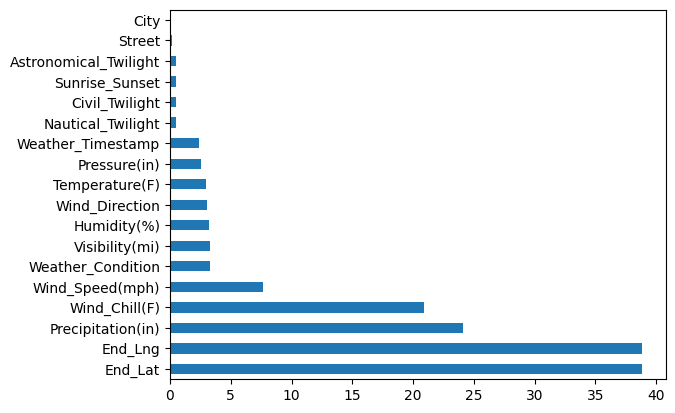

In [ ]:
missing_percentages = round(rural_df.isnull().sum().sort_values(ascending=False) /len(rural_df) *100,2)
missing_percentages[missing_percentages.values > 0].plot(kind='barh')
plt.show()

Attributes like End_Lng and End_Lat contains around 38% missing values.One possible reason could be most accidents are point accidents and it may not essentially have a end point( latitude and longitude).

As we can see, here there are more than one columns which consists null values. So we will see whether we need those values or they can be neglected.

In [ ]:
rural_df.isna().sum()  ### Looking For is NA values

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  7175
End_Lng                  7175
Distance(mi)                0
Description                 0
Street                     37
City                        1
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp         436
Temperature(F)            552
Wind_Chill(F)            3855
Humidity(%)               588
Pressure(in)              471
Visibility(mi)            608
Wind_Direction            569
Wind_Speed(mph)          1408
Precipitation(in)        4447
Weather_Condition         615
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction  

In [ ]:
rural_df.duplicated().sum()

0

Droppping useless features

In [ ]:
rural_df = rural_df.drop(['Country','Turning_Loop'], axis=1)

Fixing Time Stamp

In [ ]:
rural_df['Start_Time'] = pd.to_datetime(rural_df['Start_Time'])

In [ ]:
rural_df['year'] = rural_df['Start_Time'].dt.year
rural_df['month'] = rural_df['Start_Time'].dt.month
rural_df['day'] = rural_df['Start_Time'].dt.day

rural_df['hour'] = rural_df['Start_Time'].dt.hour
rural_df['minute'] = rural_df['Start_Time'].dt.minute

## Which City in US has reported most no. of Accident Cases

In [ ]:
city_df = pd.DataFrame(rural_df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [ ]:
Cities=rural_df.City.unique()
len(Cities)

2084

2084 uniques cities

In [ ]:
top_10_cities = pd.DataFrame(city_df.head(10))
top_10_cities

,City,Cases
0,Oklahoma City,253
1,Los Gatos,237
2,Kansas City,226
3,Phoenix,174
4,Austin,165
5,Acton,161
6,Saint Paul,145
7,Temecula,131
8,Sterling,127
9,West Columbia,104


<Axes: ylabel='City'>

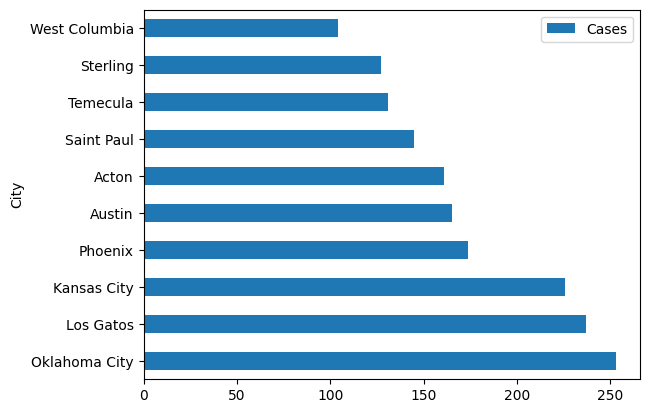

In [ ]:
top_10_cities.plot(kind='barh',x='City', y='Cases')

Oklahoma city (under Rural Areas) has most Accidents

In [ ]:
import warnings
warnings.filterwarnings('ignore')


plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

### which Year has most no.of accidents?

<Axes: xlabel='year', ylabel='count'>

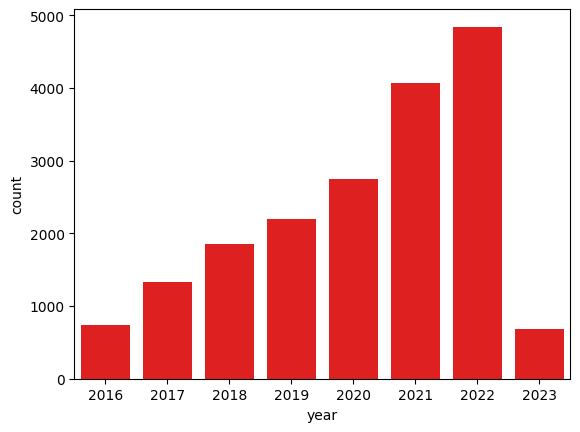

In [ ]:
sns.countplot(x=rural_df.year, color='red')

Year 2022 has most Number of Accidents

## What is the most month has accidents?

In [ ]:
count_month = rural_df['month'].value_counts().reset_index()
count_month.columns = ['month', 'count']

<Axes: xlabel='month', ylabel='count'>

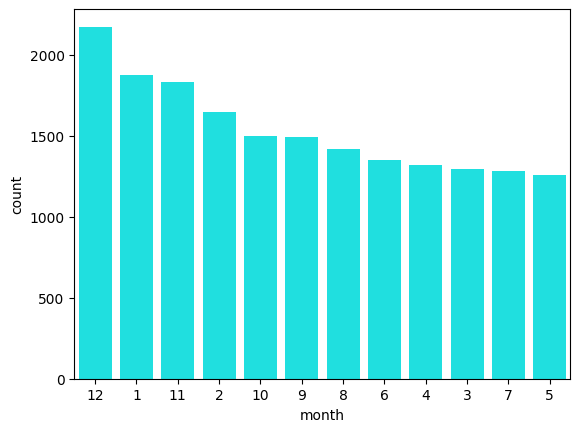

In [ ]:
sns.countplot(x=rural_df.month, color='cyan', order=count_month.month)

DECEMBER has most accidents occured(probably winters has most accidents)

### Which Day has most accidents?

<Axes: xlabel='Start_Time'>

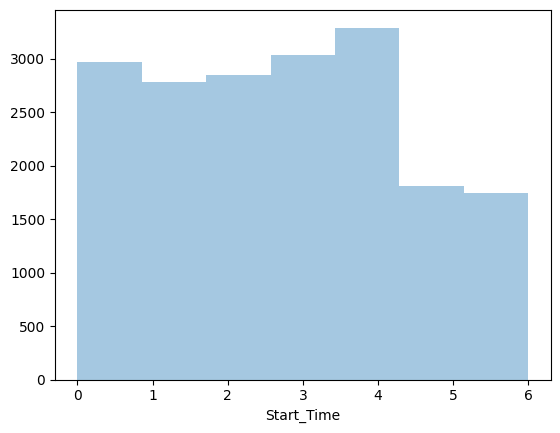

In [ ]:
sns.distplot(rural_df.Start_Time.dt.dayofweek,bins=7,kde=False)

Less Number of accidents occured on weekends. ( Probably less travelling for work in weekends.)

<Axes: xlabel='Start_Time'>

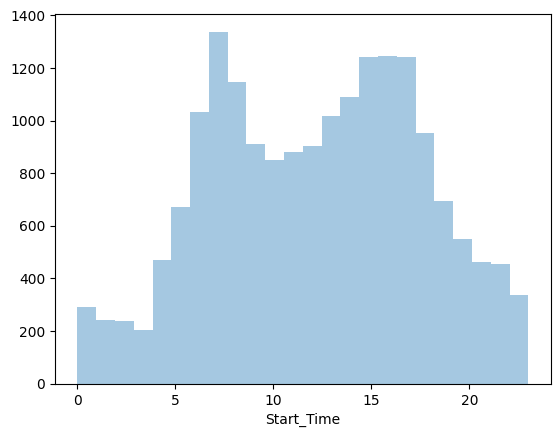

In [ ]:
sns.distplot(rural_df.Start_Time.dt.hour,bins=24,kde=False)

High number of accidents occured around 7am to 9am in the morning.

In [ ]:
from functools import reduce
sunsets = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

def valid_progression_from_day_to_night( rural_df, col):
    a = rural_df[col[0]].fillna('Night') >=rural_df[col[1]].fillna('Day')
    b = rural_df[col[1]].fillna('Night') >= rural_df[col[2]].fillna('Day')
    c = rural_df[col[2]].fillna('Night') >= rural_df[col[3]].fillna('Day')
    return reduce( np.logical_and, [a,b,c])

ok = valid_progression_from_day_to_night(rural_df, sunsets )

is_twilight = np.logical_and( rural_df.Sunrise_Sunset == 'Night', rural_df.Astronomical_Twilight=='Day')
rural_df['day_night'] = 'Unclassified'
rural_df.loc[df.Sunrise_Sunset=='Day', 'day_night'] = 'Day'
rural_df.loc[df.Astronomical_Twilight=='Night', 'day_night'] = 'Night'
rural_df.loc[ is_twilight, 'day_night'] = 'Twilight'
rural_df.loc[ ~ok, 'day_night'] = 'Erroneous'
rural_df.day_night.value_counts()

Day             12357
Night            3422
Twilight         2593
Unclassified       91
Name: day_night, dtype: int64

As can be seen above, the various twilight categories were filled out on the vast majority of the records, allowing one to simply infer whether the accident occurred during the day vs twilight vs night.
Most accidents occured during day

## Which Street has most accidents?

In [ ]:
rural_df['Street'].value_counts().nlargest(1)

I-81 S    277
Name: Street, dtype: int64

## Plotting Accident Points

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

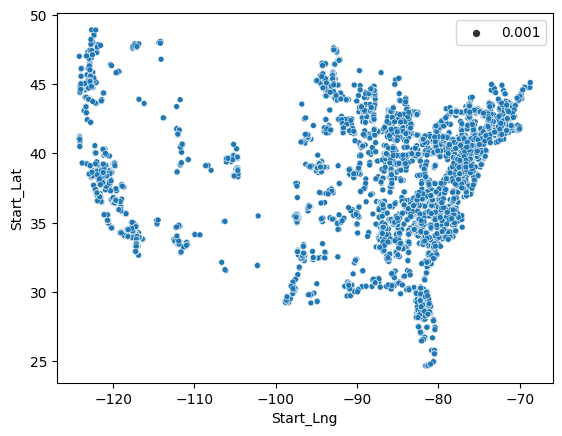

In [ ]:
sns.scatterplot(data=rural_df, x='Start_Lng', y='Start_Lat',size=0.001)

## Accident Severity and Frequency Analysis

It Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). Note that severity reported by different sources may differ in their underlying impact on traffic, so please separate data from different sources when doing severity-based analysis.

In [ ]:
severity_df = pd.DataFrame(rural_df['Severity'].value_counts()).rename(columns={'index':'Severity', 'Severity':'Cases'})

<Axes: xlabel='Severity', ylabel='count'>

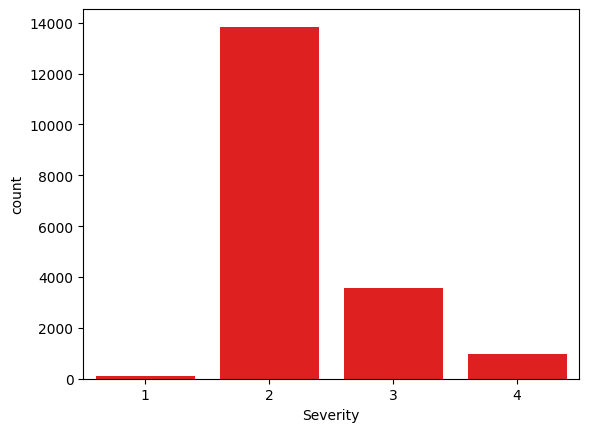

In [ ]:
sns.countplot(x=rural_df.Severity, color='red')

Around 80% of accidents has severity as moderate ( severity-2)

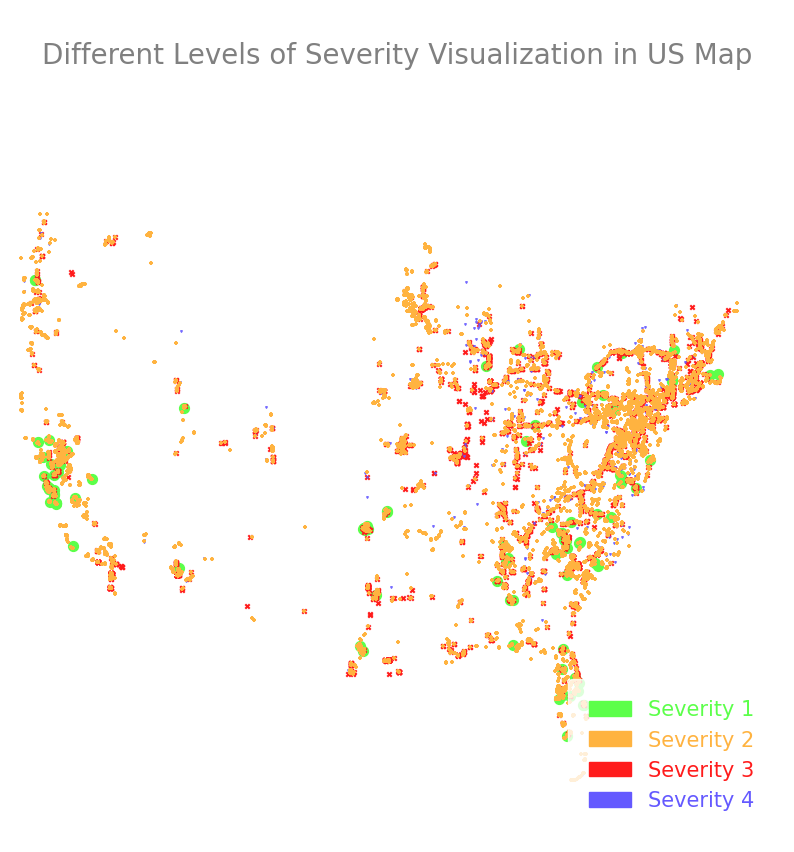

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim([-125, -65])
ax.set_ylim([22, 55])

# Scatter plot for each severity level
scatter_s1 = ax.scatter(rural_df[rural_df['Severity'] == 1]['Start_Lng'],
                        rural_df[rural_df['Severity'] == 1]['Start_Lat'],
                        s=50, color='#5cff4a', marker='o', label='Severity 1')

scatter_s3 = ax.scatter(rural_df[rural_df['Severity'] == 3]['Start_Lng'],
                        rural_df[rural_df['Severity'] == 3]['Start_Lat'],
                        s=10, color='#ff1c1c', marker='x', label='Severity 3')

scatter_s4 = ax.scatter(rural_df[rural_df['Severity'] == 4]['Start_Lng'],
                        rural_df[rural_df['Severity'] == 4]['Start_Lat'],
                        s=1, color='#6459ff', marker='v', label='Severity 4')

scatter_s2 = ax.scatter(rural_df[rural_df['Severity'] == 2]['Start_Lng'],
                        rural_df[rural_df['Severity'] == 2]['Start_Lat'],
                        s=5, color='#ffb340', marker='+', label='Severity 2')

# Hide spines and ticks
for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.tick_params(top=False, bottom=False, left=False, right=False,
               labelleft=False, labelbottom=False)

# Title
plt.title('\nDifferent Levels of Severity Visualization in US Map', size=20, color='grey')

# Legend
legend_elements = [mpatches.Patch(color='#5cff4a', label='Severity 1'),
                   mpatches.Patch(color='#ffb340', label='Severity 2'),
                   mpatches.Patch(color='#ff1c1c', label='Severity 3'),
                   mpatches.Patch(color='#6459ff', label='Severity 4')]

ax.legend(handles=legend_elements, prop={'size': 15}, loc='lower right', borderpad=1,
          labelcolor=['#5cff4a', '#ffb340', '#ff1c1c', '#6459ff'], edgecolor='white')

plt.show()


In [ ]:
accident_severity_df = rural_df.groupby(['year', 'Severity']).size().unstack()

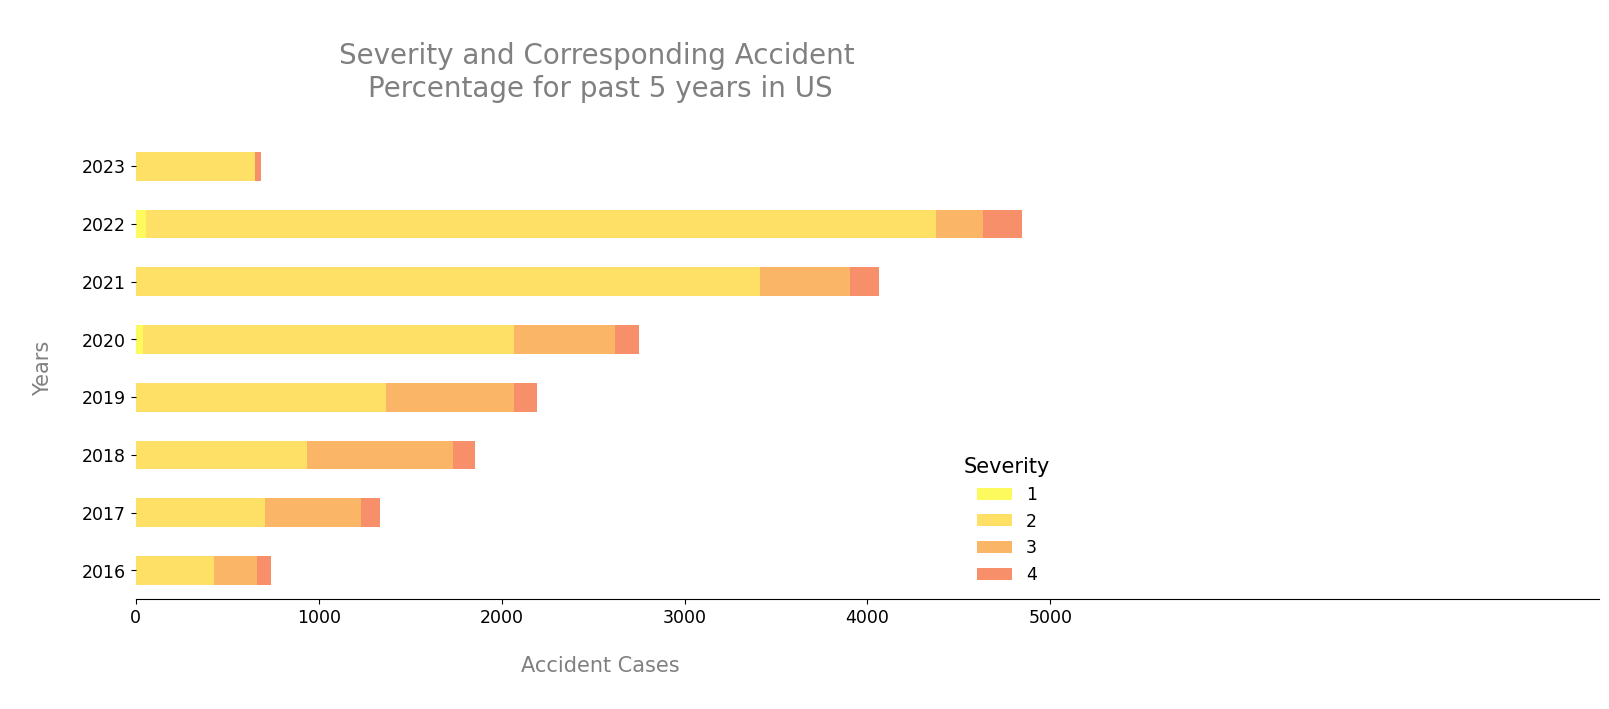

In [ ]:
ax = accident_severity_df.plot(kind='barh', stacked=True, figsize=(12, 6),
                               color=['#fcfa5d', '#ffe066', '#fab666', '#f68f6a'],
                               rot=0);

ax.set_title('\nSeverity and Corresponding Accident \nPercentage for past 5 years in US\n', fontsize=20, color='grey');

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.spines['bottom'].set_bounds(0, 8000);
ax.set_ylabel('\nYears\n', fontsize=15, color='grey');
ax.set_xlabel('\nAccident Cases\n', fontsize=15, color='grey');
ax.legend(prop={'size': 12.5}, loc='best', fancybox = True, title="Severity", title_fontsize=15, edgecolor='white');
ax.tick_params(axis='both', which='major', labelsize=12.5)



2021 has most severity level 3 and level 4

## Analyze geographical factors that might contribute to these hotspots.

## Lets See Effects of Road Safety attributes like Bump, Crossing, Give way, Junction, No exit, traffic signal, Exit, Traffic Calming etc present on the Road On Accidents.

In [ ]:
filtered_df = rural_df[rural_df[['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
                      'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']].any(axis=1) == False]


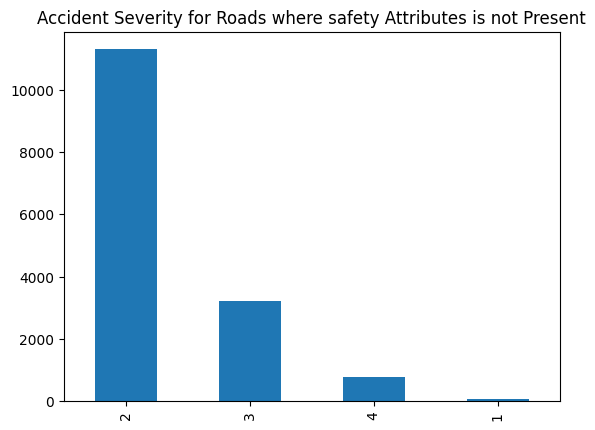

In [ ]:
filtered_df['Severity'].value_counts().plot(kind='bar')
plt.title("Accident Severity for Roads where safety Attributes is not Present")
plt.show()


So Severity is mostly Moderate( severity-2 ) with No Safety attributes Present Nearby accidents.

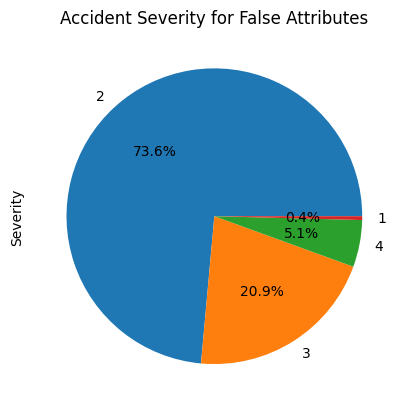

In [ ]:
filtered_df['Severity'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Accident Severity for False Attributes")
plt.show()


73.6% are moderate severity

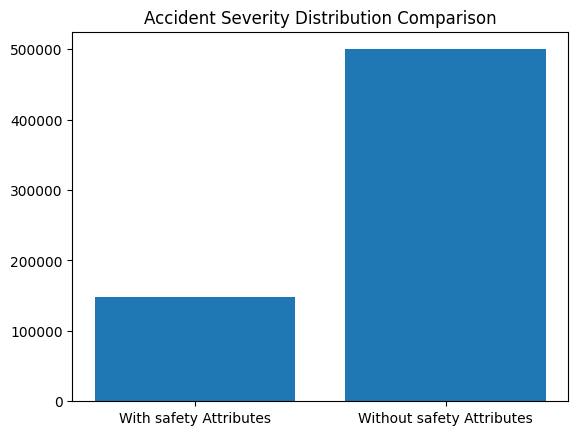

In [ ]:
attributes = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
               'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']

# Create two DataFrames based on attribute presence
df_with_attr = df[df[attributes].any(axis=1)]
df_without_attr = df[df[attributes].all(axis=1) == False]

# Example 1: Severity distribution comparison (bar chart)
plt.bar(["With safety Attributes", "Without safety Attributes"],
        [df_with_attr['Severity'].value_counts().sum(), df_without_attr['Severity'].value_counts().sum()])
plt.title("Accident Severity Distribution Comparison")
plt.show()



CLearly, When safety attributes like bump, no exit, No way are Not There, more accidents have occured.

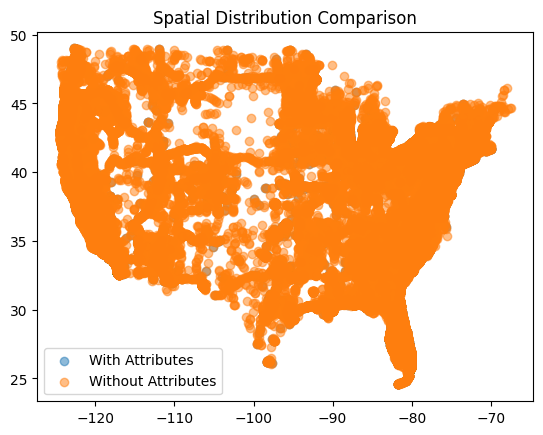

In [ ]:
# Example 2: Spatial distribution comparison (scatter plot)
plt.scatter(df_with_attr['Start_Lng'], df_with_attr['Start_Lat'], alpha=0.5, label="With Attributes")
plt.scatter(df_without_attr['Start_Lng'], df_without_attr['Start_Lat'], alpha=0.5, label="Without Attributes")
plt.title("Spatial Distribution Comparison")
plt.legend()
plt.show()

### Here we can see more number of accidents have occured when road safety attributes were False( not present) in the Road.

In [ ]:
pip install geoplot --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 23.0 MB/s eta 0:00:00


In [ ]:
import gc

#supress warnings
import warnings
warnings.filterwarnings("ignore")
#import geopandas and geoplot libraries
import geopandas
import geoplot as gplt
import geoplot.crs as gcrs

In [ ]:
def generate_intervals_labels(attribute, split, gap):
    var_min = min(rural_df[attribute])
    intervals = [int(var_min)]
    labels = []
    for i in range(1, split+1):

        lower_limit = int(var_min+((i-1)*gap))

        if i==split:
            upper_limit = int(max(df[attribute]))
        else:
            upper_limit = int(var_min + (i*gap))

        #intervals
        intervals.append(upper_limit)

        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)

    return intervals, labels

In [ ]:
def Feature_Bin_Plot(dataframe, attribute, clrs, intervals, labels, fig_size, font_size, y_lim, adjust, title):

    new_df = dataframe.copy()
    xlabel = 'Different {} Grouped Value'.format(attribute)
    new_df[xlabel] = pd.cut(x = new_df[attribute], bins = intervals, labels = labels, include_lowest=True)
    temp_df = pd.DataFrame(new_df[xlabel].value_counts()).reset_index().rename(columns={'index':'Bins', xlabel:'Cases'}).sort_values('Bins')

    count,max_index = 0, 0
    cases_list = list(temp_df['Cases'])
    for i in cases_list:
        if i == max(temp_df['Cases']):
            max_index = count
            break
        count += 1

    total = len(new_df[xlabel])
    plt.figure(figsize=fig_size)

    cmap = cm.get_cmap(clrs, len(intervals))
    clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

    ax=sns.barplot(y=temp_df['Cases'], x=temp_df['Bins'], palette=clrs);

    for i in ax.patches:
        ax.text(i.get_x()+adjust[0], i.get_height()+adjust[-1], \
            '{:,d}\nCases\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=font_size,
                color='black')

    plt.title(title, size=20, color='grey')
    plt.ylim(y_lim)

    for i in ['bottom', 'top', 'left', 'right']:
        ax.spines[i].set_color('white')
        ax.spines[i].set_linewidth(1.5)

    ax.set_xlabel('\n{}\n'.format(xlabel), fontsize=15, color='grey')
    ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
    ax.tick_params(axis='both', which='major', labelsize=12)
    MA = mpatches.Patch(color=clrs[max_index], label='{} Range with Maximum\n no. of Road Accidents'.format(attribute))
    ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1,
              labelcolor=[clrs[max_index]], edgecolor='white');

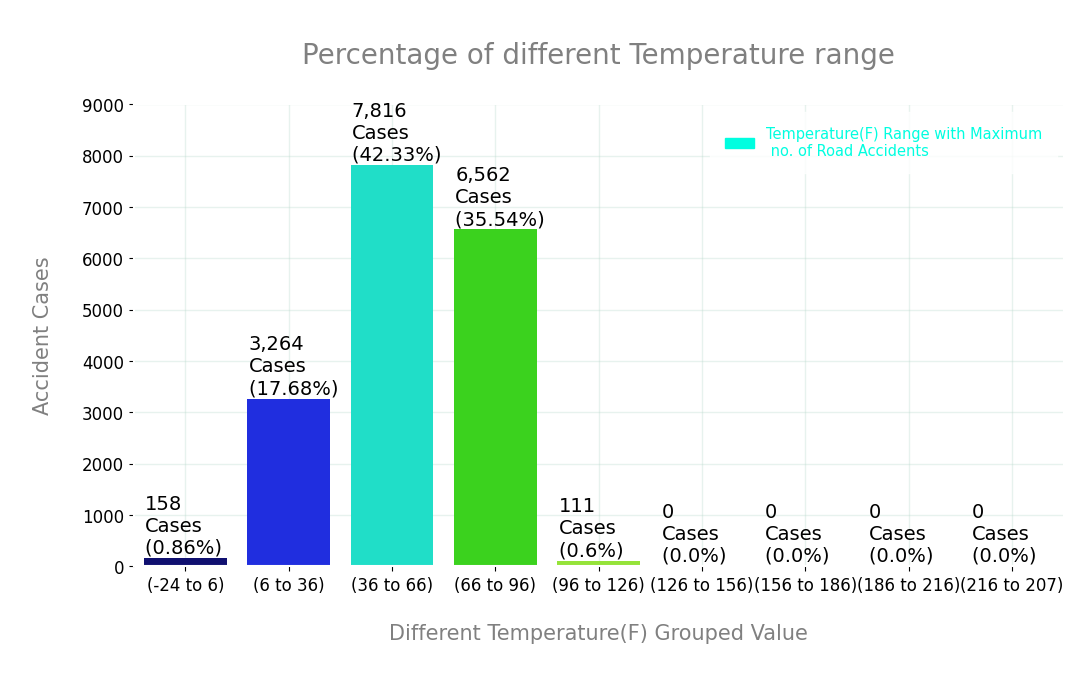

In [ ]:
temp_intervals, temp_labels = generate_intervals_labels('Temperature(F)', 9, 30)

Feature_Bin_Plot(rural_df, 'Temperature(F)', 'gist_ncar',np.sort(temp_intervals), temp_labels,
                 (12, 6), 14, (0, 9000), [0.01, 100], '\nPercentage of different Temperature range\n')

42% of accidents have occured in 36(F) to 66(F) temperature

# Humidity Effect

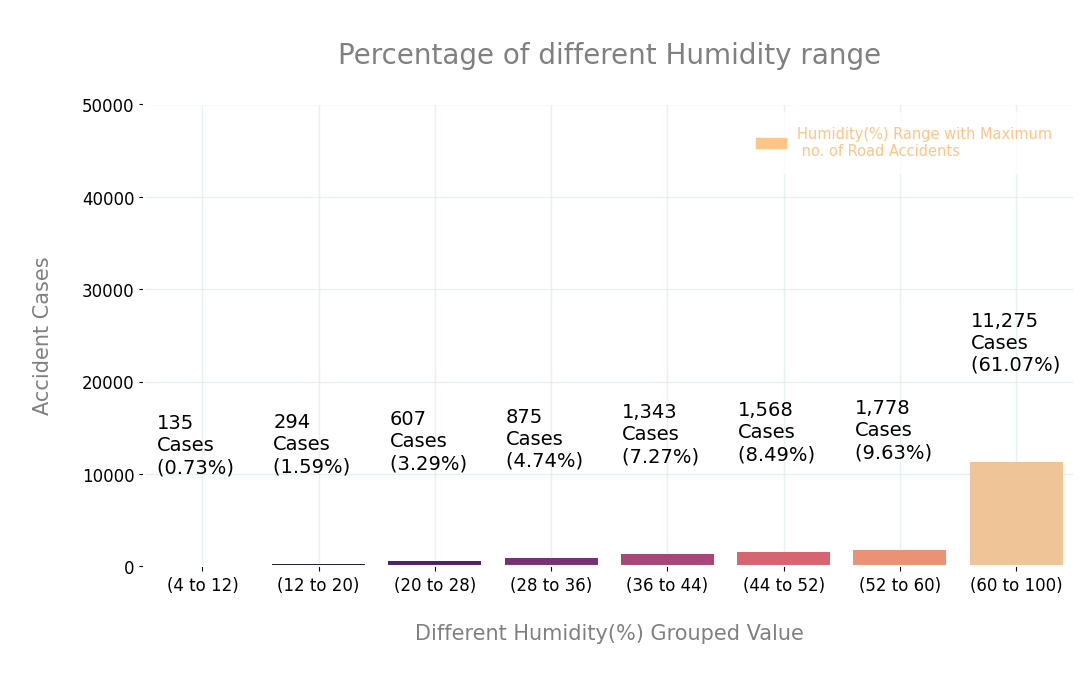

In [ ]:
Humidity_intervals, Humidity_labels = generate_intervals_labels('Humidity(%)', 8, 8)

Feature_Bin_Plot(rural_df, 'Humidity(%)', 'magma', Humidity_intervals, Humidity_labels,
                 (12, 6), 14, (0,50000), [0.01, 10000], '\nPercentage of different Humidity range\n')

61% cases occured within high humidity value ( 60-100 % level)
-
Humidity(%) has a linear relationship with the frequency of accidents.

## Pressure factor

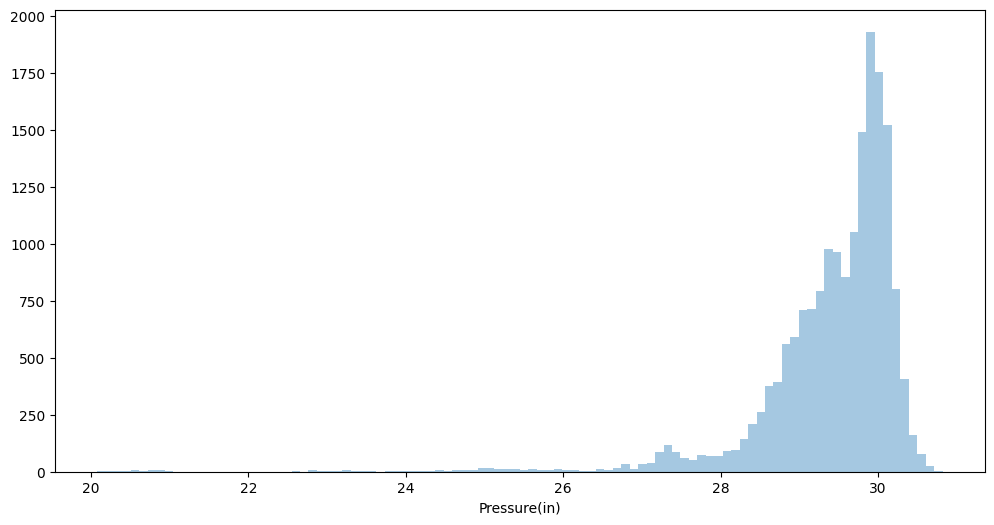

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(rural_df['Pressure(in)'], kde = False, bins = 100)
plt.show()

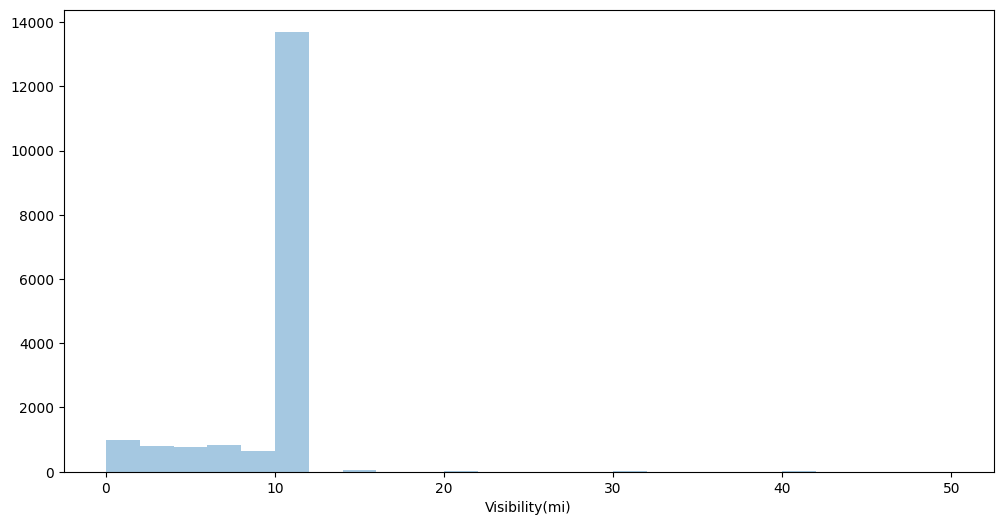

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(rural_df['Visibility(mi)'], kde = False, bins = 25)
plt.show()

Most accidents occured with visibilty less than 15 miles.

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a folium map centered at a specific location
m = folium.Map(location=[rural_df['Start_Lat'].mean(), rural_df['Start_Lng'].mean()], zoom_start=4.4)

# Convert your data to a list of coordinates
data = rural_df[['Start_Lat', 'Start_Lng']].values.tolist()

# Create a HeatMap layer and add it to the folium map
HeatMap(data).add_to(m)

# Display the folium map
m

## Predictive Modeling:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


## Correlation Matrix

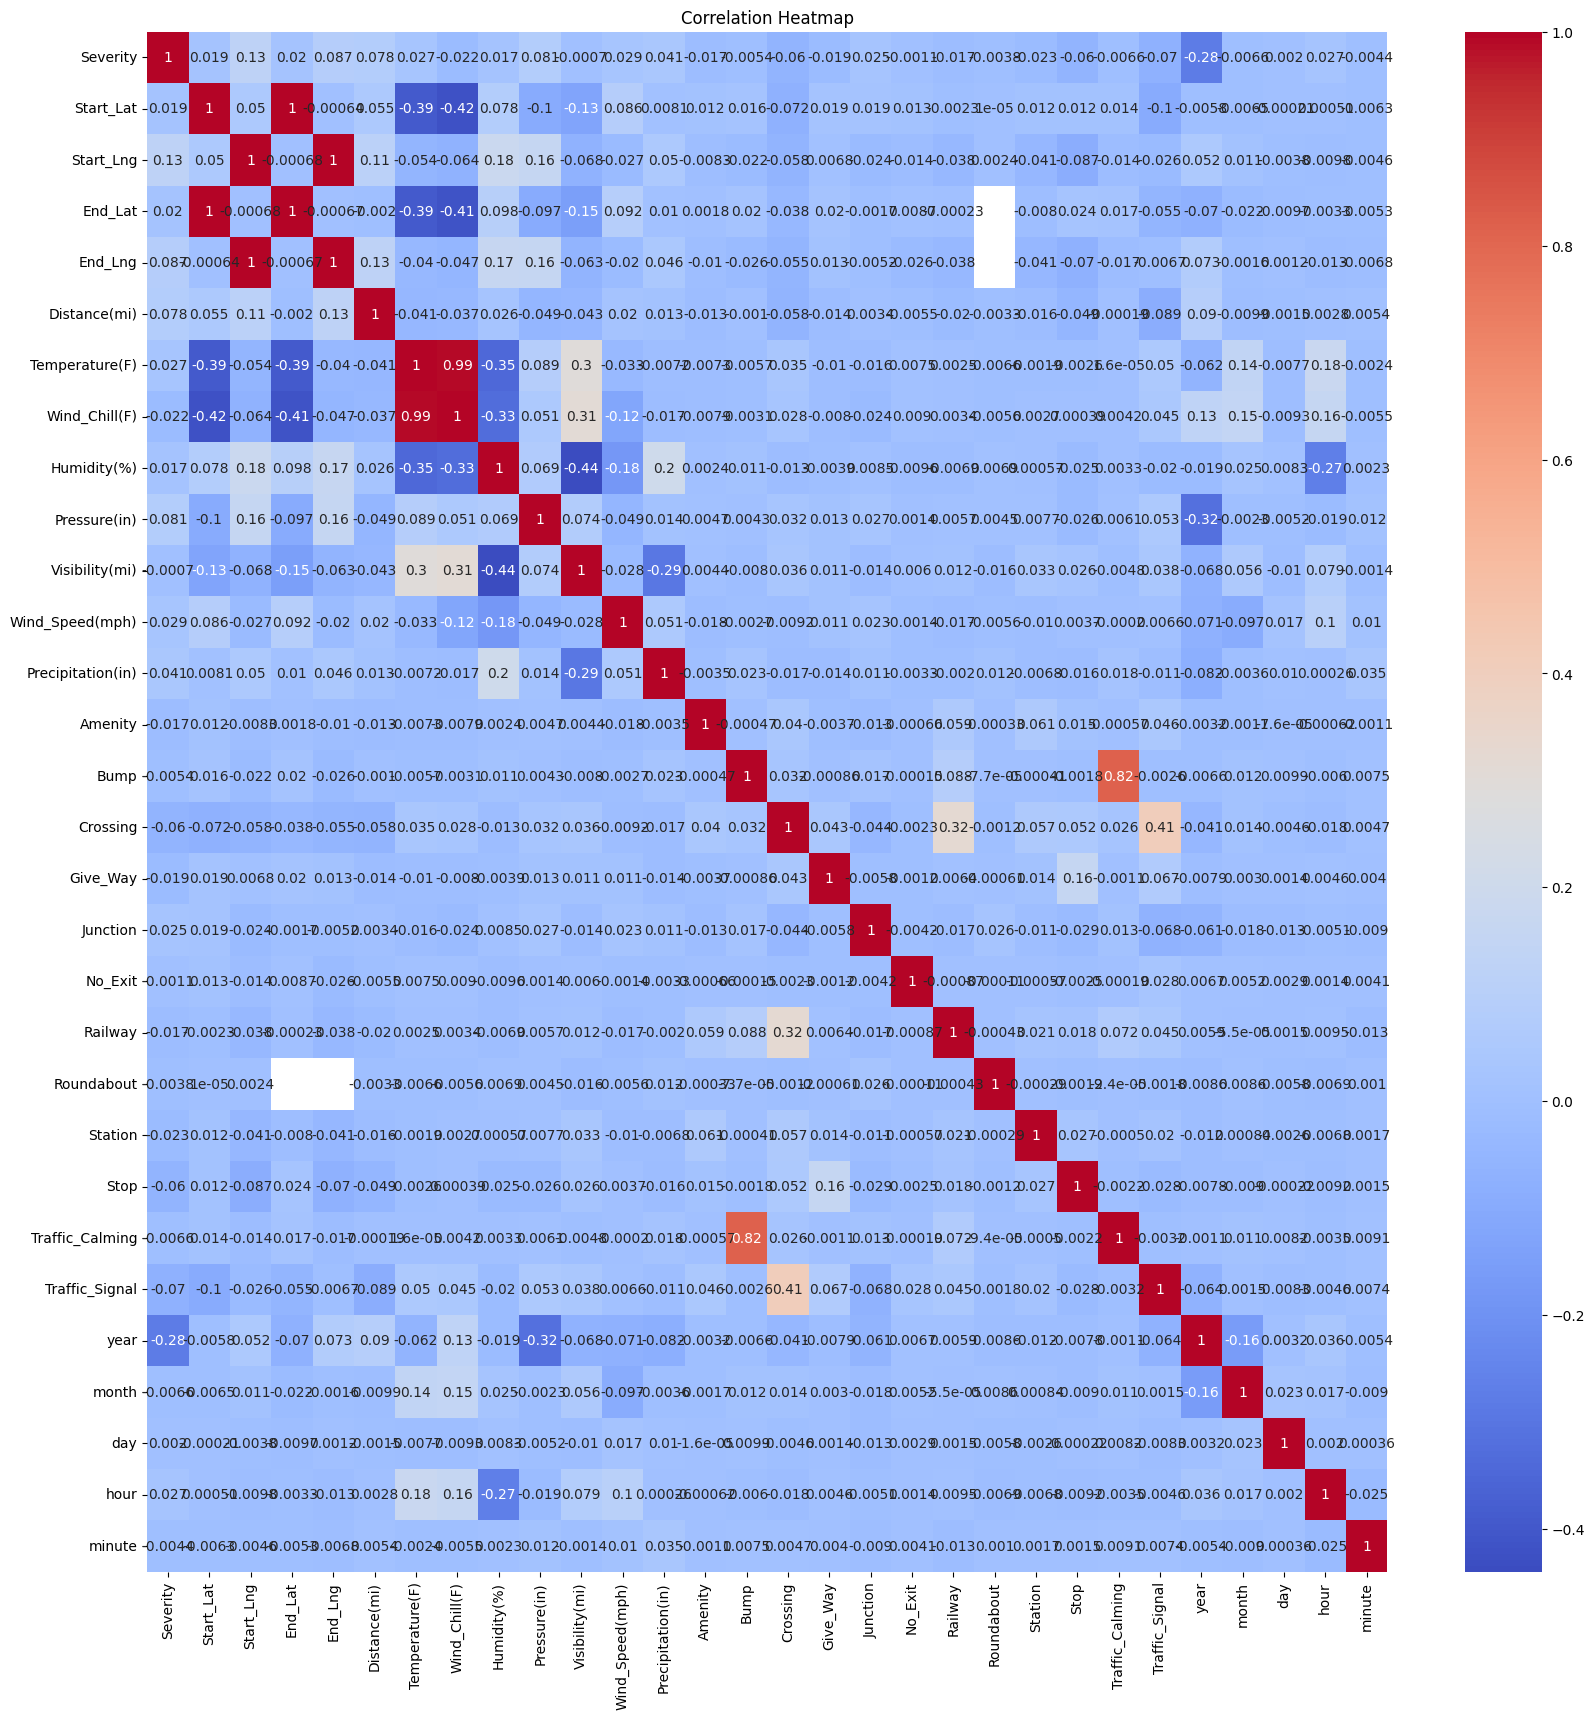

In [ ]:
corr_matrix = rural_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Most attributes have no or less correlation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df1 = rural_df.copy()

In [ ]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'year', 'month', 'day', 'hour', 'minute',
       'day_night'],
      dtype='object')

In [ ]:
df1.drop(columns=['Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description','Street', 'City', 'County', 'State', 'Zipcode','ID','Start_Time', 'End_Time'])

,Source,Severity,Start_Lat,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,day,hour,minute,day_night
16,Source1,2,38.132332,US/Eastern,KEZF,2021-07-21 18:15:00,84.0,84.0,54.0,29.79,...,Day,Day,Day,Day,2021,7,21,18,13,Day
22,Source2,2,34.651295,US/Central,KHSV,2022-03-16 14:53:00,64.0,64.0,75.0,29.24,...,Day,Day,Day,Day,2022,3,16,15,15,Day
108,Source2,2,40.692017,US/Eastern,KUNV,2017-09-21 09:53:00,66.2,NaN,88.0,30.13,...,Day,Day,Day,Day,2017,9,21,10,13,Day
121,Source1,2,42.469340,US/Central,KMXO,2021-02-02 23:55:00,7.0,7.0,92.0,29.31,...,Night,Night,Night,Night,2021,2,2,23,54,Night
173,Source2,2,40.096840,US/Eastern,KJST,2020-03-09 08:54:00,50.0,50.0,31.0,27.95,...,Day,Day,Day,Day,2020,3,9,8,56,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499864,Source1,2,37.508475,US/Eastern,KRIC,2022-06-19 11:54:00,73.0,73.0,29.0,29.94,...,Day,Day,Day,Day,2022,6,19,11,29,Day
499969,Source3,2,32.460789,US/Central,KMXF,2022-07-19 07:56:00,80.0,80.0,79.0,29.83,...,Day,Day,Day,Day,2022,7,19,7,41,Day
499973,Source2,2,37.145508,US/Pacific,KSJC,2017-02-21 18:53:00,53.1,NaN,83.0,30.21,...,Night,Night,Day,Day,2017,2,21,18,31,Twilight
499983,Source2,3,42.669571,US/Eastern,KORE,2020-01-02 14:52:00,39.0,34.0,65.0,29.25,...,Day,Day,Day,Day,2020,1,2,14,40,Day


In [ ]:
df1.dropna()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,day,hour,minute,day_night
16,A-6214306,Source1,2,2021-07-21 18:13:56,2021-07-21 18:32:30,38.132332,-77.511383,38.121960,-77.516320,0.765,...,Day,Day,Day,Day,2021,7,21,18,13,Day
121,A-6429874,Source1,2,2021-02-02 23:54:35,2021-02-03 01:51:37.000000,42.469340,-91.086799,42.471268,-91.134196,2.419,...,Night,Night,Night,Night,2021,2,2,23,54,Night
313,A-6863529,Source1,2,2020-11-07 05:10:00,2020-11-07 07:33:41,42.646619,-70.976775,42.654459,-70.976845,0.542,...,Night,Night,Night,Day,2020,11,7,5,10,Twilight
329,A-7256645,Source1,2,2020-02-10 08:16:22,2020-02-10 08:46:00,43.089600,-76.367680,43.089600,-76.367680,0.000,...,Day,Day,Day,Day,2020,2,10,8,16,Day
393,A-6385041,Source1,2,2021-02-16 06:42:43,2021-02-16 15:53:29,26.548192,-81.839293,26.546607,-81.838579,0.118,...,Night,Day,Day,Day,2021,2,16,6,42,Twilight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499728,A-4834009,Source1,2,2022-12-15 14:36:39,2022-12-15 15:54:40,38.129134,-77.512923,38.118169,-77.517540,0.798,...,Day,Day,Day,Day,2022,12,15,14,36,Day
499778,A-5014829,Source1,2,2022-12-17 12:52:33,2022-12-17 14:38:24,35.658631,-80.860810,35.603155,-80.859375,3.834,...,Day,Day,Day,Day,2022,12,17,12,52,Day
499839,A-6317570,Source1,2,2021-05-05 14:18:00,2021-05-05 16:44:23,40.450474,-76.516263,40.537963,-76.429016,7.587,...,Day,Day,Day,Day,2021,5,5,14,18,Day
499864,A-4369204,Source1,2,2022-06-19 11:29:25,2022-06-19 13:35:26.000000000,37.508475,-77.124698,37.506455,-77.099325,1.398,...,Day,Day,Day,Day,2022,6,19,11,29,Day


In [ ]:
df1=df1.drop(columns=['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'year', 'month', 'day', 'hour', 'minute', 'day_night'])

In [ ]:
X=df1.drop('Severity',axis=1)
y=df1['Severity']

In [ ]:
X

,ID,Source,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
16,13616,0,271,10268,84.0,84.0,54.0,29.79,10.0,8,...,0,0,0,0,0,0,0,0,0,0
22,15225,1,378,12939,64.0,64.0,75.0,29.24,10.0,0,...,0,0,0,0,0,0,0,0,0,0
108,5426,1,840,1562,66.2,NaN,88.0,30.13,10.0,1,...,0,0,0,0,0,0,0,0,0,0
121,14259,0,581,8708,7.0,7.0,92.0,29.31,0.0,0,...,0,0,0,0,0,0,1,1,1,1
173,1338,1,439,6248,50.0,50.0,31.0,27.95,10.0,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499864,8233,0,698,13971,73.0,73.0,29.0,29.94,10.0,10,...,0,0,0,0,0,0,0,0,0,0
499969,11936,2,580,14335,80.0,80.0,79.0,29.83,10.0,0,...,0,0,0,0,0,0,0,0,0,0
499973,5541,1,755,887,53.1,NaN,83.0,30.21,6.0,21,...,0,0,0,0,0,0,1,1,0,0
499983,1734,1,629,5848,39.0,34.0,65.0,29.25,10.0,12,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

16        2
22        2
108       2
121       2
173       2
         ..
499864    2
499969    2
499973    2
499983    3
499990    2
Name: Severity, Length: 18463, dtype: int64

In [ ]:
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

In [ ]:
categorical_cols = df1.select_dtypes(include=['object','bool','category']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

In [ ]:
# loading the model
model = XGBRegressor()
model.fit(X,y)
training_data_prediction = model.predict(X)
print(training_data_prediction)

[2.0470228 2.3674843 2.3910747 ... 2.186819  2.622822  1.995139 ]


In [ ]:
training_data_prediction = model.predict(X)

In [ ]:
print(training_data_prediction)

[2.0117376 1.9881198 1.8696244 ... 3.5359628 2.1171184 2.0187013]


Adjusted R squuared values 0.5464214818053776
R squared error :  0.5562966897840893
Mean Absolute Error :  0.20395139930665002


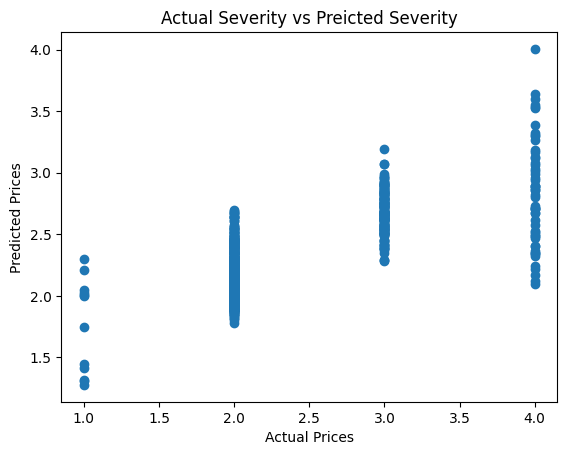

In [ ]:
# R squared error
score_1 = metrics.r2_score(y, training_data_prediction)
y_pred = model.predict(X)
def calculate_adjusted_r2(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2
# Mean Absolute Error
n = len(y)
p = X.shape[1]
score_2 = metrics.mean_absolute_error(y, training_data_prediction)
adjusted_r2 = calculate_adjusted_r2(y, y_pred, n, p)
print(f"Adjusted R squuared values",adjusted_r2)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(y, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Severity vs Preicted Severity")
plt.show()

XGBoost has shown good accuracy score of 55%

## Random Forest Classifier

In [ ]:
sampled_dff = df1.sample(frac=0.1, random_state=42)

sampled_dff.dropna(inplace=True)

categorical_cols = sampled_dff.select_dtypes(include=['object','bool','category']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    sampled_dff[col] = label_encoder.fit_transform(sampled_dff[col])

X = sampled_dff.drop('Severity', axis=1)
y= sampled_dff['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# print(classification_task(rf_classifier,X_train, y_train ,X_test,y_test, y_pred,'rf'))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.83
Confusion Matrix:
[[  0   5   0   0]
 [  0 319  12   0]
 [  0  37  12   0]
 [  0  14   1   0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.85      0.96      0.90       331
           3       0.48      0.24      0.32        49
           4       0.00      0.00      0.00        15

    accuracy                           0.83       400
   macro avg       0.33      0.30      0.31       400
weighted avg       0.76      0.83      0.79       400



Random Forest Classifier has shown a good accuray score of 83%